In [1]:
from z3 import *
from pathlib import Path


from IPython.display import Image, display

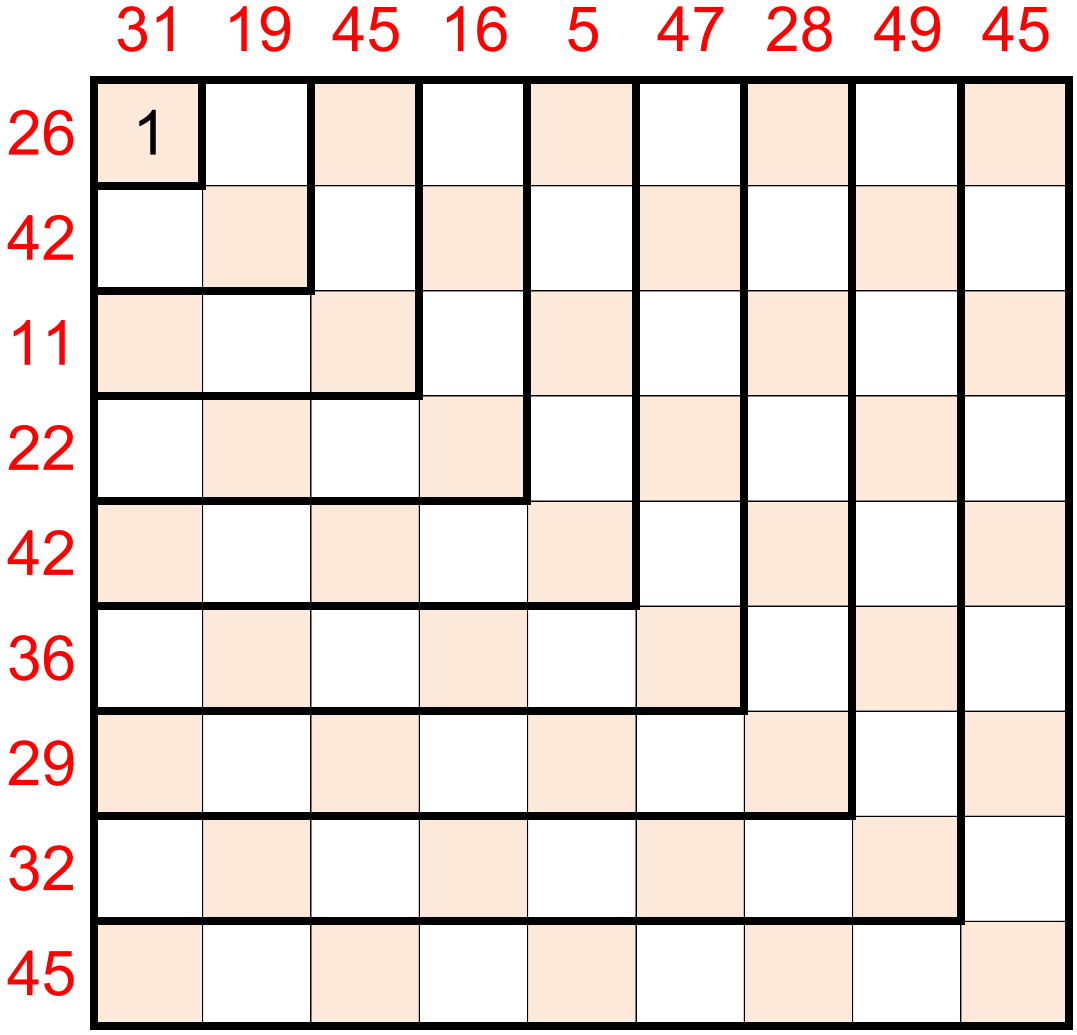

In [4]:
root = Path.cwd()
png_path = root / "Visualisation.png"
display(Image(filename = png_path))

In [45]:
grid = [[Int(f"cell_{r}_{c}") for r in range(9)] for c in range(9)]

In [44]:
hooks = []
for i in range(9):
    hook = ([grid[r][c] for r in range(i + 1) for c in range(i + 1)])
    if i >= 1:
        hook_previous = ([grid[r][c] for r in range(i) for c in range(i)])
        for k in hook[:]:
            if k in hook_previous:
                hook.remove(k)
    hooks.append(hook)

In [51]:
constraints = []

n = 1
for hook in hooks:
    for cell in hook:
        constraints.append(Or(cell == 0, cell == n))
    constraints.append(Sum(hook) == n ** 2)
    n += 1

row_sums = [26, 42, 11, 22, 42, 36, 29, 32, 45]
col_sums = [31, 19, 45, 16, 5, 47, 28, 49, 45]

for r in range(9):
    row_num = Sum([grid[r][c] for c in range(9)])
    constraints.append(row_num == row_sums[r])

for c in range(9):
    col_num = Sum([grid[r][c] for r in range(9)])
    constraints.append(col_num == col_sums[c])

In [53]:
opt = Optimize()
opt.add(constraints)

if opt.check() == sat:
    model = opt.model()
    solution = [[model.evaluate(grid[r][c]).as_long() for c in range(9)] for r in range(9)]
    total = sum(
        solution[r][c]
        for r in range(9)
        for c in range(9)
        if (r + c) % 2 == 0
    )
    print("Max sum:", total)
    for row in solution:
        print(row)

else:
    print("No solution found")

Max sum: 158
[1, 0, 3, 0, 0, 6, 7, 0, 9]
[2, 2, 3, 0, 5, 6, 7, 8, 9]
[3, 0, 0, 0, 0, 0, 0, 8, 0]
[4, 4, 4, 4, 0, 6, 0, 0, 0]
[5, 5, 5, 5, 0, 6, 7, 0, 9]
[0, 0, 6, 0, 0, 6, 7, 8, 9]
[7, 0, 7, 7, 0, 0, 0, 8, 0]
[0, 8, 8, 0, 0, 8, 0, 8, 0]
[9, 0, 9, 0, 0, 9, 0, 9, 9]
